# Zestaw zadań: Kwadratury adaptacyjne
## Zadanie 1
### Autor: Artur Gęsiarz

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

### Implementacja kwadratury adapatacyjnej trapezow

In [24]:
def adaptive_trapezoidal_rule(func, a, b, tol=1e-6):
    def trapezoidal_rule(f, a, b):
        return (b - a) * (f(a) + f(b)) / 2

    def adaptive_trapezoidal_recursive(f, a, b, tol, integral_approx, evaluations):
        c = (a + b) / 2
        integral_approx_left = trapezoidal_rule(f, a, c)
        integral_approx_right = trapezoidal_rule(f, c, b)
        integral_approx_current = integral_approx_left + integral_approx_right
        evaluations += 2

        if abs(integral_approx_current - integral_approx) < 3 * tol:
            return integral_approx_current, evaluations
        else:
            integral_left, evaluations = adaptive_trapezoidal_recursive(f, a, c, tol / 2, integral_approx_left,
                                                                        evaluations)
            integral_right, evaluations = adaptive_trapezoidal_recursive(f, c, b, tol / 2, integral_approx_right,
                                                                         evaluations)
            return integral_left + integral_right, evaluations

    integral_approx = trapezoidal_rule(func, a, b)
    evaluations = 2
    integral, evaluations = adaptive_trapezoidal_recursive(func, a, b, tol, integral_approx, evaluations)
    return integral, evaluations


### Implementacja kwadratury adaptacyjnej Gaussa-Kronroda

In [25]:
def adaptive_gauss_kronrod(func, a, b, tol=1e-6):
    integral, error_estimate, info = quad(func, a, b, full_output=True, epsabs=tol)

    # Zwracam wynik oraz liczbe ewaluacji funkcji
    return integral, info['neval']

### Test funkcji kwadratury adaptacyjnej trapezów dla funkcji 4 / (1 + x^2) na przedziale [0, 1]

In [26]:
f = lambda x: 4 / (1 + x ** 2)
integral_trapezoidal = adaptive_trapezoidal_rule(f, 0, 1)
print("Wartość całki (kwadratura adaptacyjna trapezów):", integral_trapezoidal)

Wartość całki (kwadratura adaptacyjna trapezów): (3.1415925809016922, 1324)


### Test funkcji kwadratury adaptacyjnej Gaussa-Kronroda dla funkcji 4 / (1 + x^2) na przedziale [0, 1]

In [27]:
integral_gauss_kronrod = adaptive_gauss_kronrod(f, 0, 1)
print("Wartość całki (kwadratura adaptacyjna Gaussa-Kronroda):", integral_gauss_kronrod)

Wartość całki (kwadratura adaptacyjna Gaussa-Kronroda): (3.141592653589793, 21)


### Wartość dokładna całki

In [28]:
exact_integral = np.pi

### Zakres tolerancji

In [29]:
tolerances = np.logspace(2, -14, num=20)

### Inicjalizacja list do przechowywania liczby ewaluacji funkcji podcałkowej oraz błędu względnego dla obu metod

In [30]:
evaluations_trapezoidal = []
errors_trapezoidal = []

evaluations_gauss_kronrod = []
errors_gauss_kronrod = []

### Obliczenia dla kwadratury adaptacyjnej trapezów

In [31]:
for tol in tolerances:
    integral_trapezoidal, neval_trapezoidal = adaptive_trapezoidal_rule(f, 0, 1, tol)
    error_trapezoidal = abs((integral_trapezoidal - exact_integral) / exact_integral)
    evaluations_trapezoidal.append(neval_trapezoidal)
    errors_trapezoidal.append(error_trapezoidal)

### Obliczenia dla kwadratury adaptacyjnej Gaussa-Kronroda

In [32]:
for tol in tolerances:
    integral_gauss_kronrod, neval_gauss_kronrod = adaptive_gauss_kronrod(f, 0, 1, tol)
    error_gauss_kronrod = abs((integral_gauss_kronrod - exact_integral) / exact_integral)
    evaluations_gauss_kronrod.append(neval_gauss_kronrod)
    errors_gauss_kronrod.append(error_gauss_kronrod)

### Rysowanie wykresów

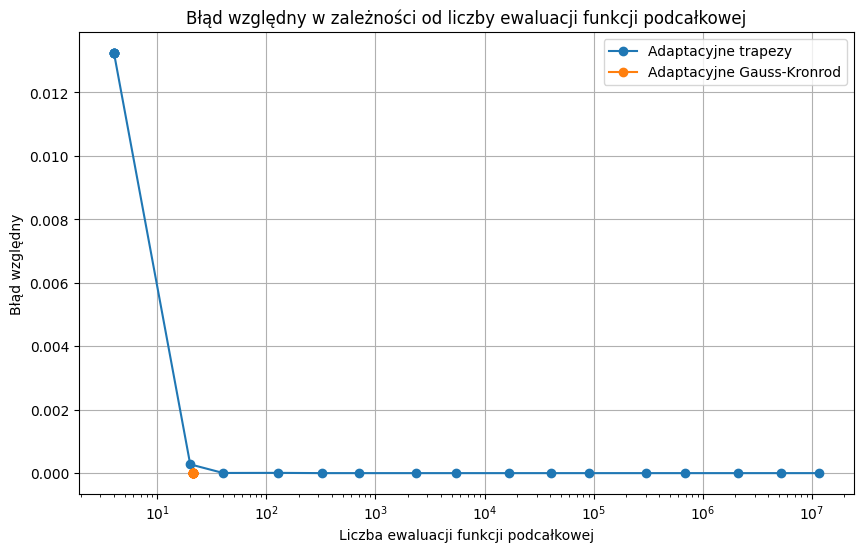

In [33]:
plt.figure(figsize=(10, 6))
plt.semilogx(evaluations_trapezoidal, errors_trapezoidal, marker='o', label='Adaptacyjne trapezy')
plt.semilogx(evaluations_gauss_kronrod, errors_gauss_kronrod, marker='o', label='Adaptacyjne Gauss-Kronrod')
plt.title('Błąd względny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
plt.ylabel('Błąd względny')
plt.legend()
plt.grid(True)
plt.show()

# zestawic z metodami nieadaptacyjnmi oraz przyjac skale logatymiczna na obu osiach